In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Loading the data

In [2]:
data=pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Basic checks

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [5]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
data.index


RangeIndex(start=0, stop=731, step=1)

In [7]:
data.shape

(731, 16)

## Data Preprocessing

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Checking outliers

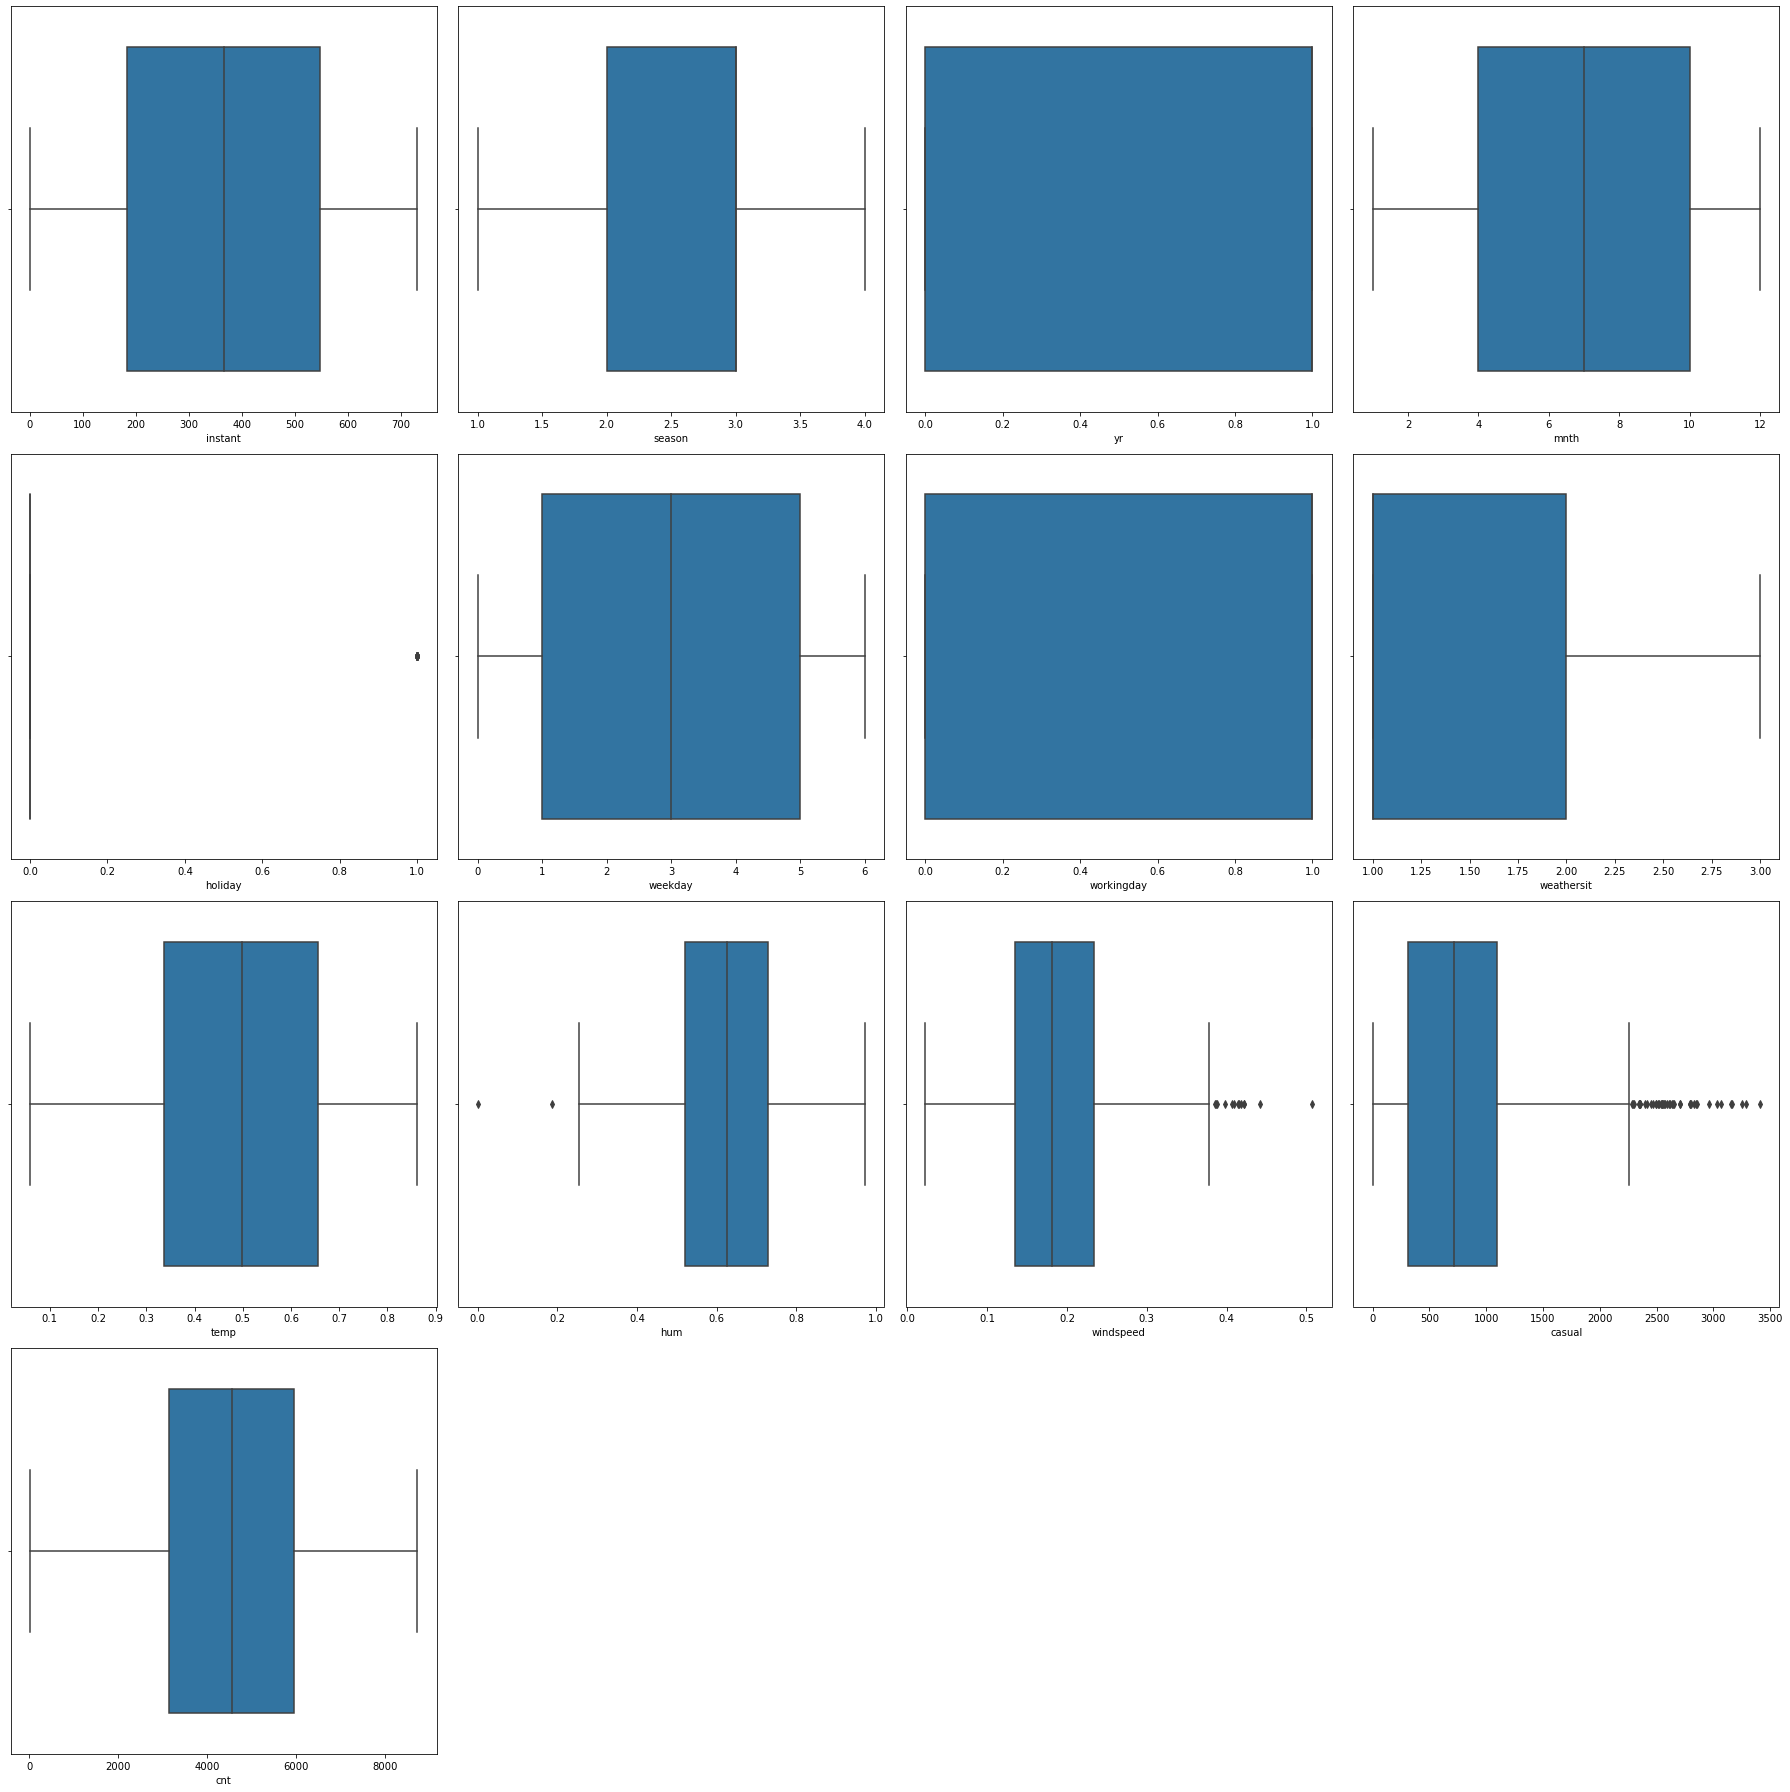

In [9]:
box=data[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'casual', 'cnt']]
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()

* IT CAN BE SEEN THAT THE GIVEN BELOW COLUMNS HAVE OUTLIERS

* hum
* windspeed
* casual

## MAKING SEPARATE VISUALIZATIONS FOR FEATURES CONTAINING OUTLIERS

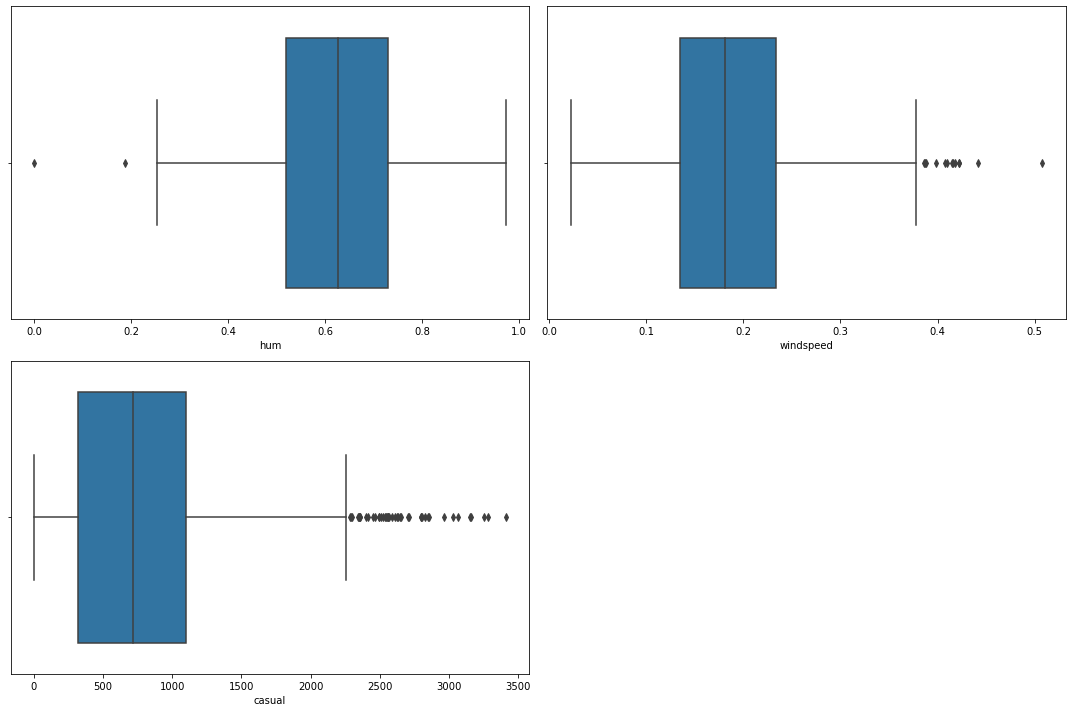

In [10]:
box=data[[   'hum', 'windspeed', 'casual']]
plt.figure(figsize=(15,10),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(2,2,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()

## HANDLING OUTLIERS
## WINDSPEED FEATURE

In [11]:
lower_limit=data.windspeed.mean() - 3*data.windspeed.std()##calculating lower limit
print(lower_limit)

upper_limit=data.windspeed.mean() + 3*data.windspeed.std()#calculating upper limit
upper_limit

-0.04200740041710149


0.4229798236729151

In [12]:
data.loc[data['windspeed']>upper_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,532,1103,1635
432,433,2012-03-08,1,1,3,0,4,1,1,0.527500,0.524604,0.567500,0.441563,486,4896,5382


In [13]:
data.loc[data['windspeed']>upper_limit,"windspeed"]=np.median(data.windspeed)

### Humidity Feature

In [14]:
lower_limit=data.hum.mean() - 3*data.hum.std()##calculating lower limit
print(lower_limit)

upper_limit=data.hum.mean() + 3*data.hum.std()#calculating upper limit
upper_limit

0.20060677751243433


1.055181348342558

In [15]:
data.loc[data['hum']<lower_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1,0,2,0,6,0,1,0.399167,0.391404,0.187917,0.180975,532,1103,1635
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.000000,0.261877,46,577,623


In [16]:
data.loc[data['hum']<lower_limit,"hum"]=np.median(data.hum)

### Casual Feature

In [17]:
lower_limit=data.casual.mean() - 3*data.casual.std()##calculating lower limit
print(lower_limit)

upper_limit=data.casual.mean() + 3*data.casual.std()#calculating upper limit
upper_limit

-1211.6909942657294


2908.0439354421997

In [18]:
data.loc[data['casual']>upper_limit]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
184,185,2011-07-04,3,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,3065,2978,6043
441,442,2012-03-17,1,1,3,0,6,0,2,0.514167,0.505046,0.755833,0.110704,3155,4681,7836
462,463,2012-04-07,2,1,4,0,6,0,1,0.437500,0.426129,0.254167,0.274871,3252,3605,6857
504,505,2012-05-19,2,1,5,0,6,0,1,0.600000,0.566908,0.456250,0.083975,3410,4884,8294
512,513,2012-05-27,2,1,5,0,0,0,1,0.690000,0.641425,0.697083,0.215171,3283,3308,6591
532,533,2012-06-16,2,1,6,0,6,0,1,0.631667,0.594708,0.504167,0.166667,2963,4739,7702
623,624,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,3160,5554,8714
644,645,2012-10-06,4,1,10,0,6,0,1,0.554167,0.538521,0.664167,0.268025,3031,4934,7965


In [19]:
data.loc[data['casual']>upper_limit,"casual"]=np.median(data.casual)

## Feature Selection

<AxesSubplot:>

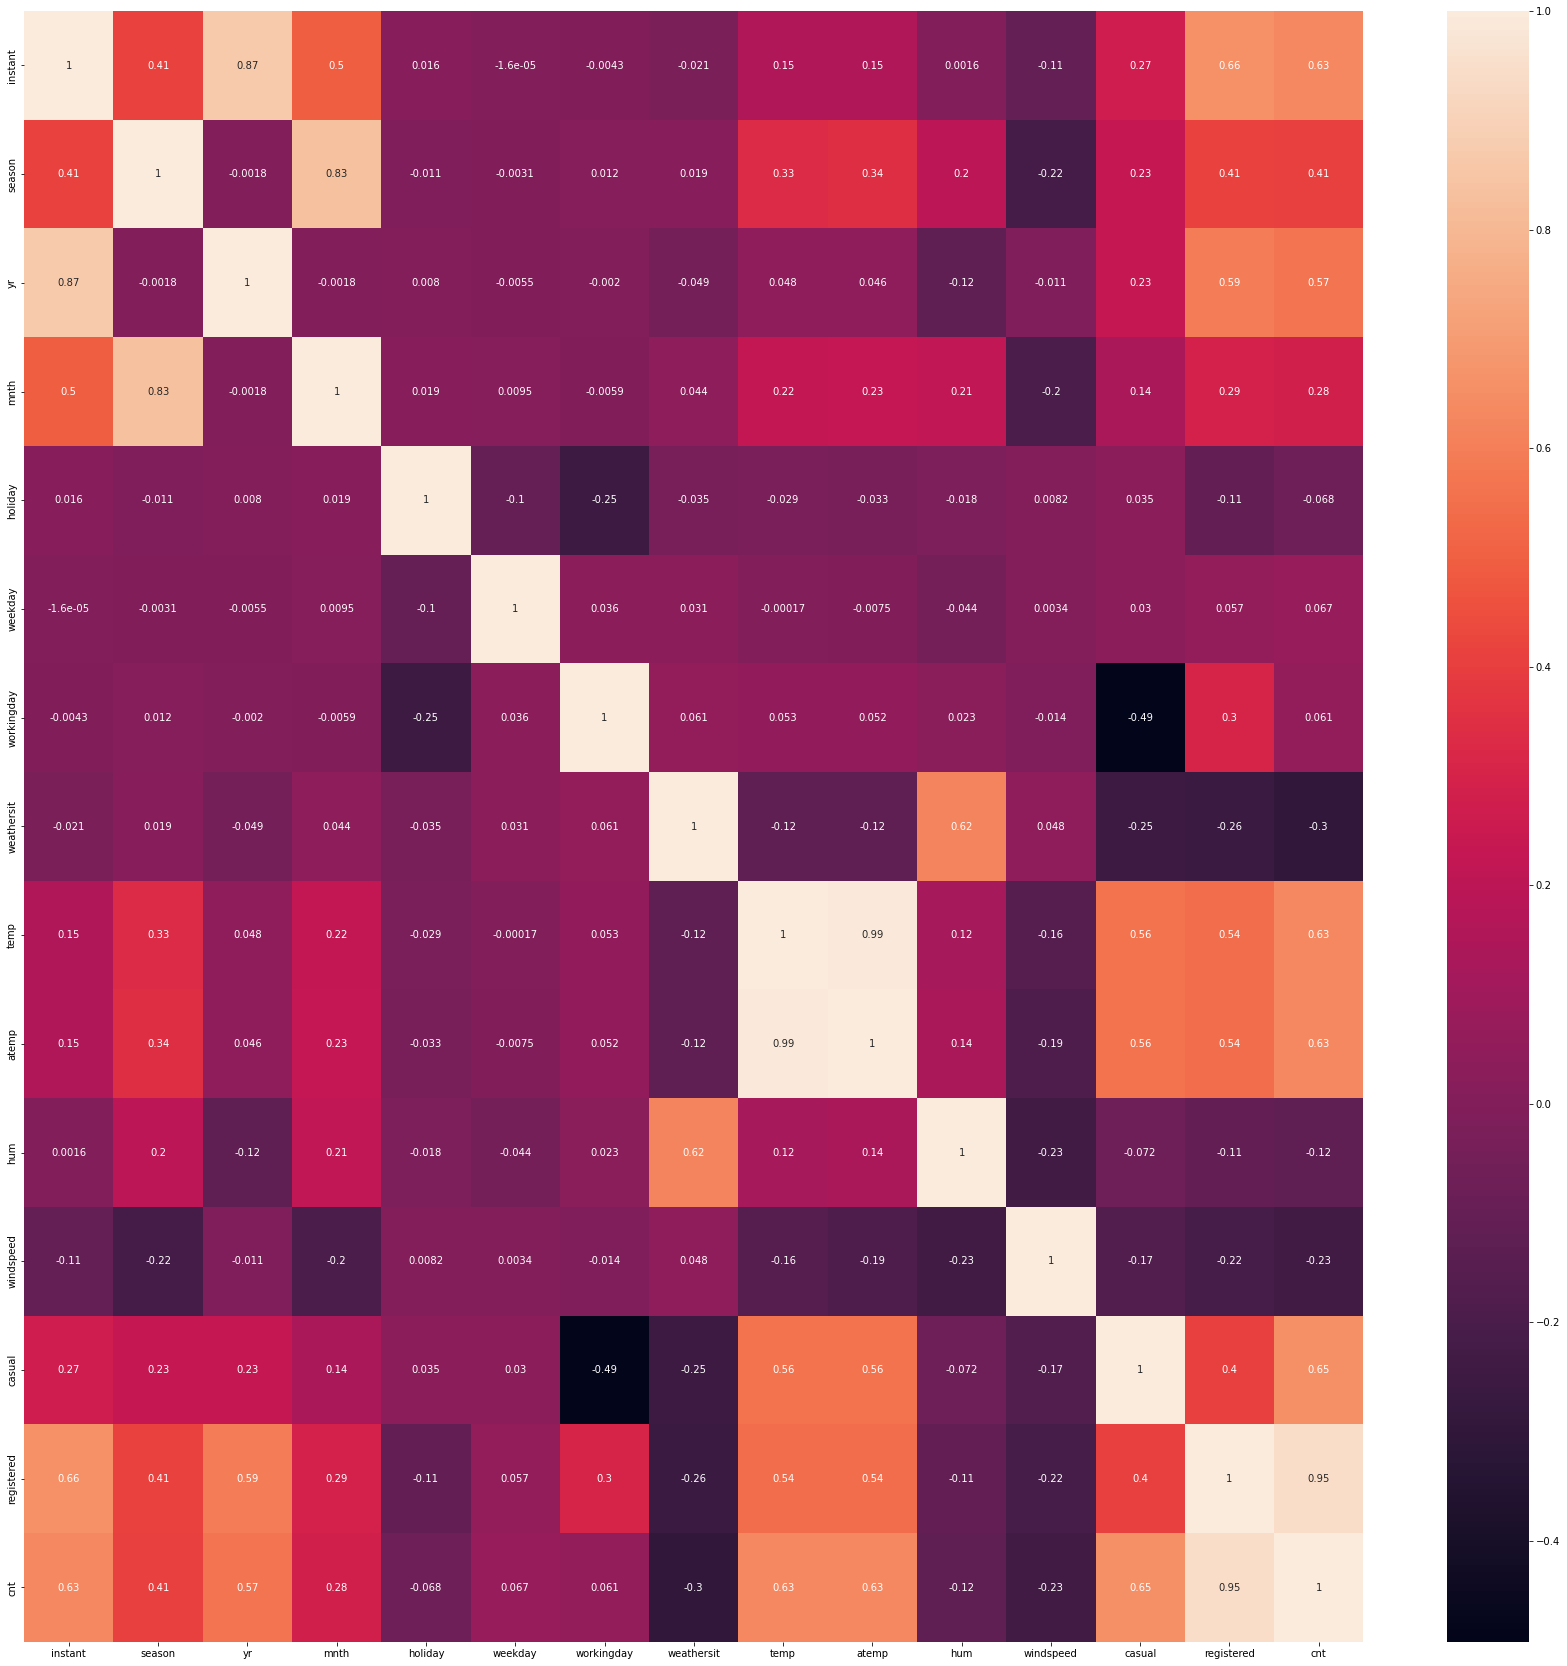

In [20]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [21]:
data.drop(["dteday","registered","atemp"],axis=1,inplace=True)

## Train-Test-Split

In [22]:
x=data.drop(["cnt"],axis=1)
y=data["cnt"]



from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

## Using Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [28]:
print("r2_score:              ",r2_score(y_test,y_pred))
print("mean_absolute_error:   ",mean_absolute_error(y_test,y_pred))
print("mean_squared_error:    ",mean_squared_error(y_test,y_pred))

r2_score:               0.892135009991626
mean_absolute_error:    467.68026859028396
mean_squared_error:     415704.55634532456


## Applying Bagging

In [29]:
from sklearn.ensemble import BaggingRegressor
bg=BaggingRegressor(base_estimator=lr,n_estimators=200)

In [30]:
bg.fit(x_train,y_train)

BaggingRegressor(base_estimator=LinearRegression(), n_estimators=200)

In [31]:
y_prediction=bg.predict(x_test)

In [32]:
print("r2_score:              ",r2_score(y_test,y_prediction))
print("mean_absolute_error:   ",mean_absolute_error(y_test,y_prediction))

r2_score:               0.891957654518037
mean_absolute_error:    467.18135973130643


## Training Report

In [33]:
y_pred_train=lr.predict(x_train)
print("r2_score:              ",r2_score(y_train,y_pred_train))
print("mean_absolute_error:   ",mean_absolute_error(y_train,y_pred_train))

r2_score:               0.8554052345271269
mean_absolute_error:    517.904276394901


### CONCLUSION OF LINEAR REGRESSION WITH BAGGING
* It can be seen that with linear regression we are geting 89% of r2 score , it means our 89% of data lies on best fit line.
* After applying boosting technique there is not even single percentage improvement to r2_score as well as mean_absolute error.
* Now lets have a try with another algorithm

### Knn

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()

In [35]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [36]:
y_pdct=knn.predict(x_test)

### Testing Report

In [37]:
print("r2_score:              ",r2_score(y_test,y_pdct))
print("mean_absolute_error:   ",mean_absolute_error(y_test,y_pdct))

r2_score:               0.7783929206642453
mean_absolute_error:    648.6907103825138


### CONCLUSION FROM KNN
* It can be seen that knn doesn't able to give good r2 score as Linear regression did.
* Error rate is also high comparitevly to Linear regression.
* Hence , we can conclude that knn model is not much suitable for this data.
### USING DECISION TREE

In [38]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [39]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [40]:
y_pd=dt.predict(x_test)

In [41]:
print("r2_score:              ",r2_score(y_test,y_pd))
print("mean_absolute_error:   ",mean_absolute_error(y_test,y_pd))

r2_score:               0.8750522212624804
mean_absolute_error:    485.43715846994536


In [42]:
### Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=200,random_state=10)

In [44]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=200, random_state=10)

In [45]:
y_hat=rfr.predict(x_test)

### Testing and training report

In [46]:
print("r2_score:              ",r2_score(y_test,y_hat))
print("mean_absolute_error:   ",mean_absolute_error(y_test,y_hat))

r2_score:               0.9243887038208018
mean_absolute_error:    377.4008196721311


In [47]:
y_hat_train=rfr.predict(x_train)
print("r2_score:              ",r2_score(y_train,y_hat_train))
print("mean_absolute_error:   ",mean_absolute_error(y_train,y_hat_train))
print("mean_squared_error:    ",mean_squared_error(y_train,y_hat_train))

r2_score:               0.9881047169309796
mean_absolute_error:    140.4174087591241
mean_squared_error:     43920.06406916059


#### CHECKING WITH RANDOMIZED SEARCH CV

In [48]:
from sklearn.ensemble import RandomForestRegressor
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=["auto","sqrt"]
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]

random_grid = {"n_estimators":n_estimators,"max_features":max_features,"max_depth":max_depth,
              "min_samples_split":min_samples_split,"min_samples_leaf":min_samples_leaf}

rf_r1 = RandomForestRegressor(random_state=42)
rf_r=RandomizedSearchCV(estimator=rf_r1,param_distributions=random_grid,n_iter=100,cv=3,verbose=3,
                          random_state=42,n_jobs=-1)

rf_r.fit(x_train,y_train)
rf_best_params=rf_r.best_params_
print("best parameters: ",rf_best_params)

NameError: name 'RandomizedSearchCV' is not defined

In [49]:
rf=RandomForestRegressor(n_estimators=2000,random_state=42,min_samples_split= 2, min_samples_leaf= 1, max_features= 'sqrt', max_depth= None)

In [50]:
rf.fit(x_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=2000, random_state=42)

In [51]:
ypred=rf.predict(x_test)

In [52]:
print("r2_score:              ",r2_score(y_test,ypred))
print("mean_absolute_error:   ",mean_absolute_error(y_test,ypred))

r2_score:               0.9252180367696498
mean_absolute_error:    355.5293825136612


### CONCLUSION
* WHEN WE APPLY RANDOM FOREST WITH DECISION TREE WE ARE GETTING 92% OF R2 SCORE .
* WHEN WE APPLY RANDOM SEARCH CV IN ORDER TO GET BEST PARAMETERS THEN ALSO THERE IS NO CHANGE IN R2 SCORE AS WELL AS ERROR RATE.
* HENCE, WE CAN CONSIDER THIS IS THE BEST SCORE.